In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import lightgbm

Loading necessary datasets

In [190]:
h1n1_train = pd.read_csv("h1n1_train.csv")

In [191]:
#h1n1_train.head()

,h1n1_concern,h1n1_knowledge,doctor_recc_h1n1,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,1.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,5.0,4.0,4.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,NaN,3.0,1.0,1.0,0.0,1.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,3.0,3.0,5.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,3.0,3.0,2.0,0.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [192]:
h1n1_train.shape

(26707, 31)

In [193]:
seas_train = pd.read_csv("seas_train.csv")

In [194]:
#seas_train.head()

,doctor_recc_seasonal,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,0.0,4.0,2.0,4.0,0.0,1.0,0.0,1.0,0.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,NaN,4.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,5.0,4.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,0.0,3.0,1.0,4.0,0.0,1.0,0.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [195]:
seas_train.shape

(26707, 29)

In [196]:
train_y = pd.read_csv("~/Desktop/flu_shot_learning/data/training_set_labels.csv")

In [197]:
h1n1_y = train_y["h1n1_vaccine"]

In [198]:
seas_y = train_y["seasonal_vaccine"]

One level encode categorical variables

In [199]:
# creating instance of labelencoder
labelencoder = LabelEncoder()

In [200]:
for x in list(seas_train.columns.values):
    #print(x)
    seas_train[x] = labelencoder.fit_transform(seas_train[x].astype(str))

doctor_recc_seasonal
opinion_seas_vacc_effective
opinion_seas_risk
opinion_seas_sick_from_vacc
behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
chronic_med_condition
child_under_6_months
health_worker
health_insurance
age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
hhs_geo_region
census_msa
household_adults
household_children
employment_industry
employment_occupation


In [201]:
for x in list(h1n1_train.columns.values):
    #print(x)
    h1n1_train[x] = labelencoder.fit_transform(h1n1_train[x].astype(str))

h1n1_concern
h1n1_knowledge
doctor_recc_h1n1
opinion_h1n1_vacc_effective
opinion_h1n1_risk
opinion_h1n1_sick_from_vacc
behavioral_antiviral_meds
behavioral_avoidance
behavioral_face_mask
behavioral_wash_hands
behavioral_large_gatherings
behavioral_outside_home
behavioral_touch_face
chronic_med_condition
child_under_6_months
health_worker
health_insurance
age_group
education
race
sex
income_poverty
marital_status
rent_or_own
employment_status
hhs_geo_region
census_msa
household_adults
household_children
employment_industry
employment_occupation


Preparing datatypes to sen into lightgbm function

In [257]:
h1n1_lgb = lightgbm.Dataset(h1n1_train, label = h1n1_y, categorical_feature = list(h1n1_train.columns.values))

In [258]:
seas_lgb = lightgbm.Dataset(seas_train, label = seas_y, categorical_feature = list(seas_train.columns.values))

Set parameters for model

In [259]:
params = {}
params['learning_rate'] = 0.01
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['feature_fraction'] = 0.5
#params['num_leaves'] = 10
#params['min_data'] = 50
params['max_depth'] = 10

Training Light GBM models

In [260]:
h1n1_model = lightgbm.train(params, h1n1_lgb, 250)

c:\users\venkatesh k\appdata\local\programs\python\python35\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [261]:
seas_model = lightgbm.train(params, seas_lgb, 250)

c:\users\venkatesh k\appdata\local\programs\python\python35\lib\site-packages\lightgbm\basic.py:1291: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


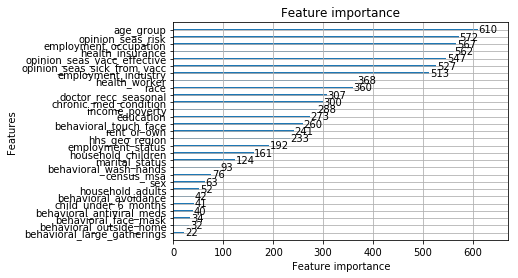

In [262]:
lightgbm.plot_importance(seas_model)

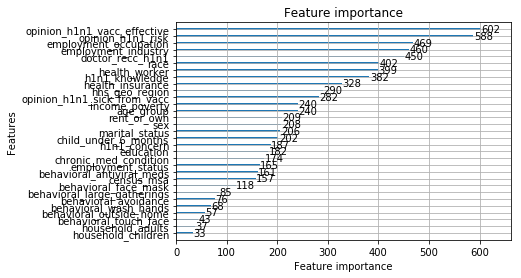

In [263]:
lightgbm.plot_importance(h1n1_model)

Prediction for test dataset

Loading test datasets

In [274]:
test_id = pd.read_csv("test_id.csv")

In [278]:
test_id.shape

(26708, 1)

In [209]:
h1n1_test = pd.read_csv("h1n1_test.csv")

In [2]:
#h1n1_test.head()

In [211]:
h1n1_test.shape

(26708, 31)

In [212]:
seas_test = pd.read_csv("seas_test.csv")

In [1]:
#seas_test.head()

In [214]:
seas_test.shape

(26708, 29)

Label encoding test datasets

In [215]:
for x in list(seas_test.columns.values):
    seas_test[x] = labelencoder.fit_transform(seas_test[x].astype(str))

In [216]:
for x in list(h1n1_test.columns.values):
    h1n1_test[x] = labelencoder.fit_transform(h1n1_test[x].astype(str))

Converting test datasets into LGBM datasets

In [217]:
#h1n1_lgb_test = lightgbm.Dataset(h1n1_test, categorical_feature = list(h1n1_test.columns.values))

In [218]:
#seas_lgb_test = lightgbm.Dataset(seas_test, categorical_feature = list(seas_test.columns.values))

Prediction

In [264]:
h1n1_pred = h1n1_model.predict(h1n1_test)

In [265]:
h1n1_pred

array([0.16547647, 0.06079046, 0.21212678, ..., 0.1491791 , 0.06787599,
       0.44788919])

In [266]:
seas_pred = seas_model.predict(seas_test)

In [267]:
seas_pred

array([0.35870044, 0.10234267, 0.5994823 , ..., 0.28842411, 0.40054434,
       0.66770455])

In [272]:
print(max(seas_pred))
print(min(seas_pred))
print(np.mean(seas_pred))

0.8903312451603613
0.09399084307737975
0.4653232260194642


In [273]:
print(max(h1n1_pred))
print(min(h1n1_pred))
print(np.mean(h1n1_pred))

0.8411287868890457
0.04227432313601969
0.21082061923391868


In [297]:
submission = pd.DataFrame({
    "respondent_id": test_id['x']
})

In [299]:
submission["h1n1_vaccine"] = h1n1_pred

In [300]:
submission["seasonal_vaccine"] = seas_pred

In [3]:
#submission.head()

In [4]:
#submission.to_csv("submission_2_lgbm.csv", index = False)